# 时间序列分析第六次作业

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、ARIMA模型的尝试
### 1.1对数变换
首先尝试了原始数据的一阶差分和二阶差分，两者通过图检验判断都显然不平稳，在此不做赘述。  
于是进一步将原始数据做一步对数变换

对数变换后的数据：[ 7.03197091  7.04438188  7.05611494  7.06970405  7.10027466  7.22037384
  7.40421825  7.60330956  7.66011432  7.69593987  7.76522975  7.88792181
  7.98517798  8.05499264  8.15575549  8.37768972  8.55988863  8.73908796
  8.91031443  9.06544638  9.19785779  9.34522784  9.50265395  9.70418503
  9.84710978  9.98577006 10.18098557 10.36247099 10.56514923 10.8458705
 11.02403011]
均值：8.611265094204487，方差：1.5208449124285213


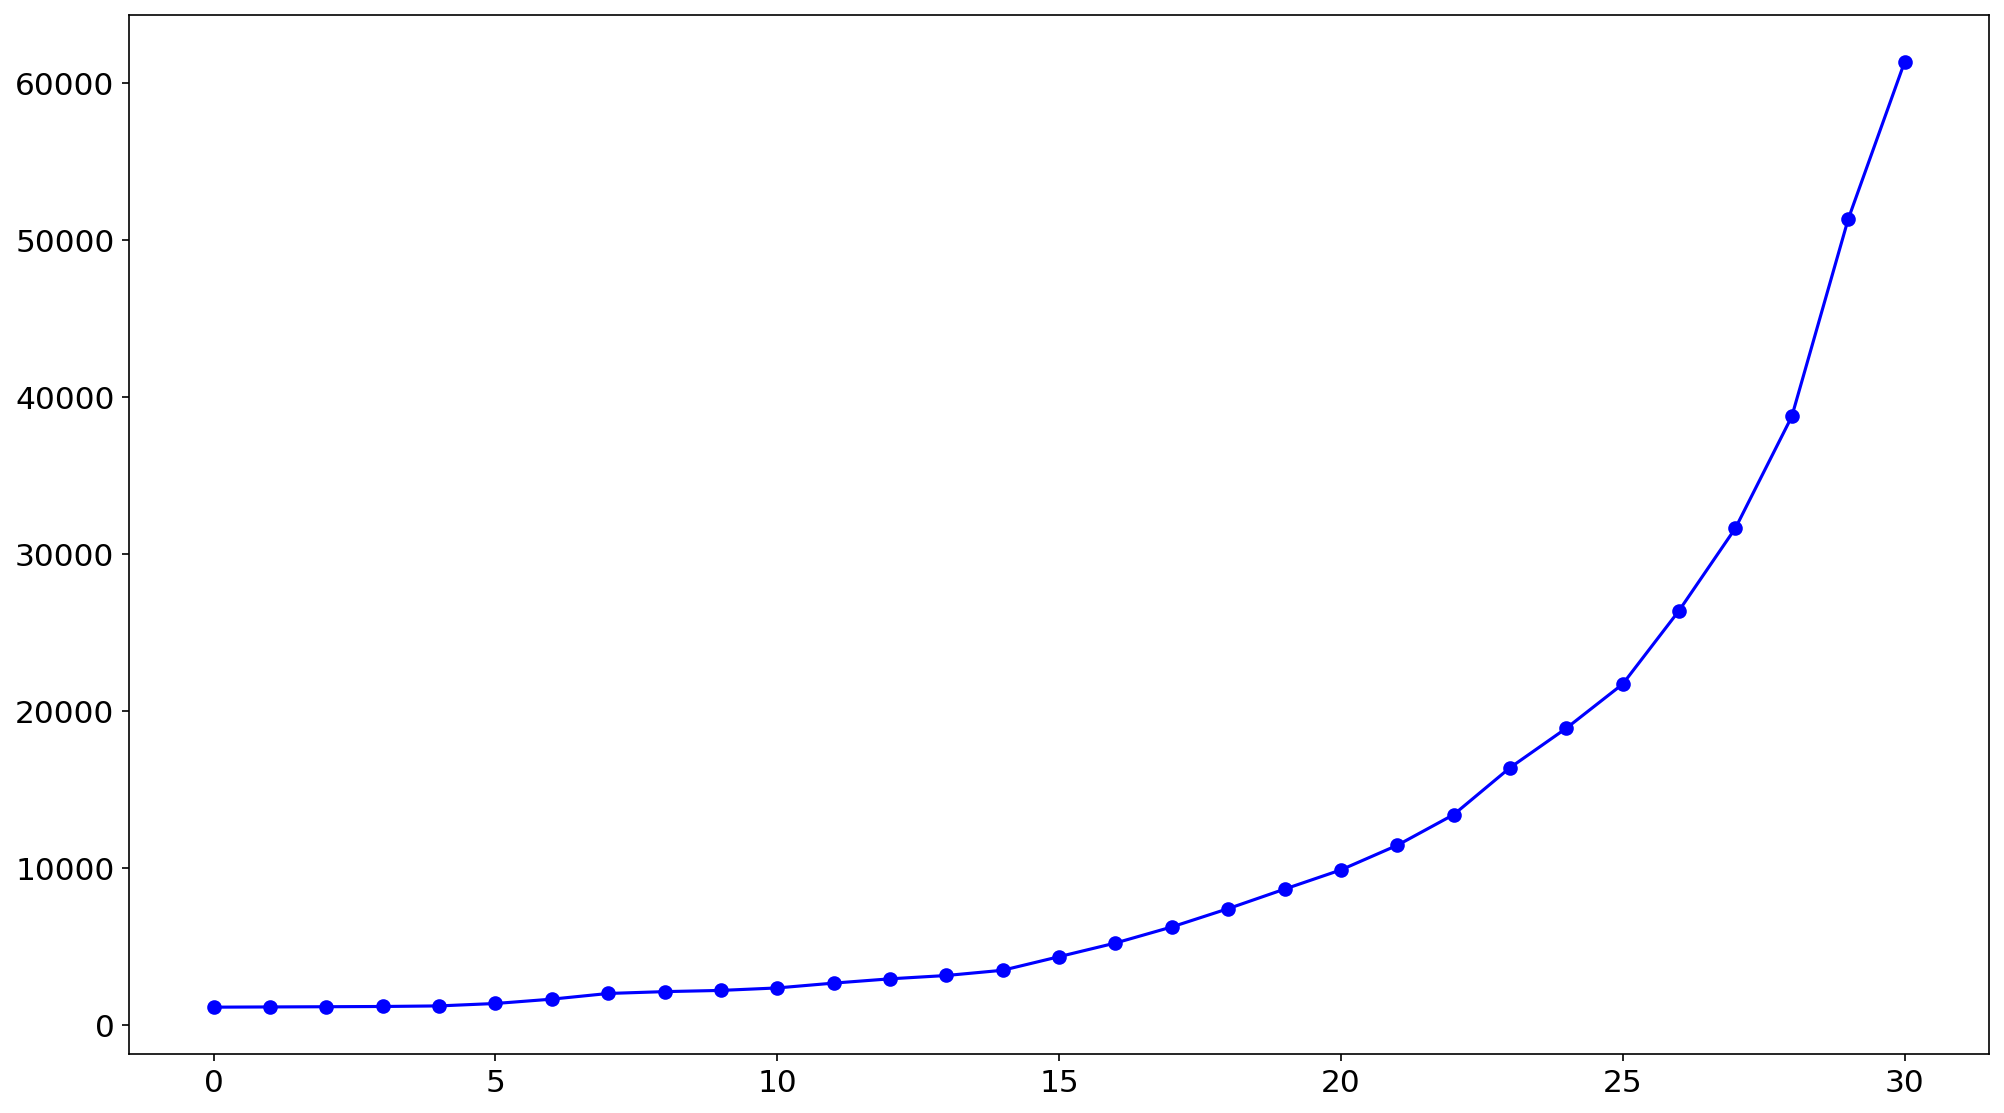

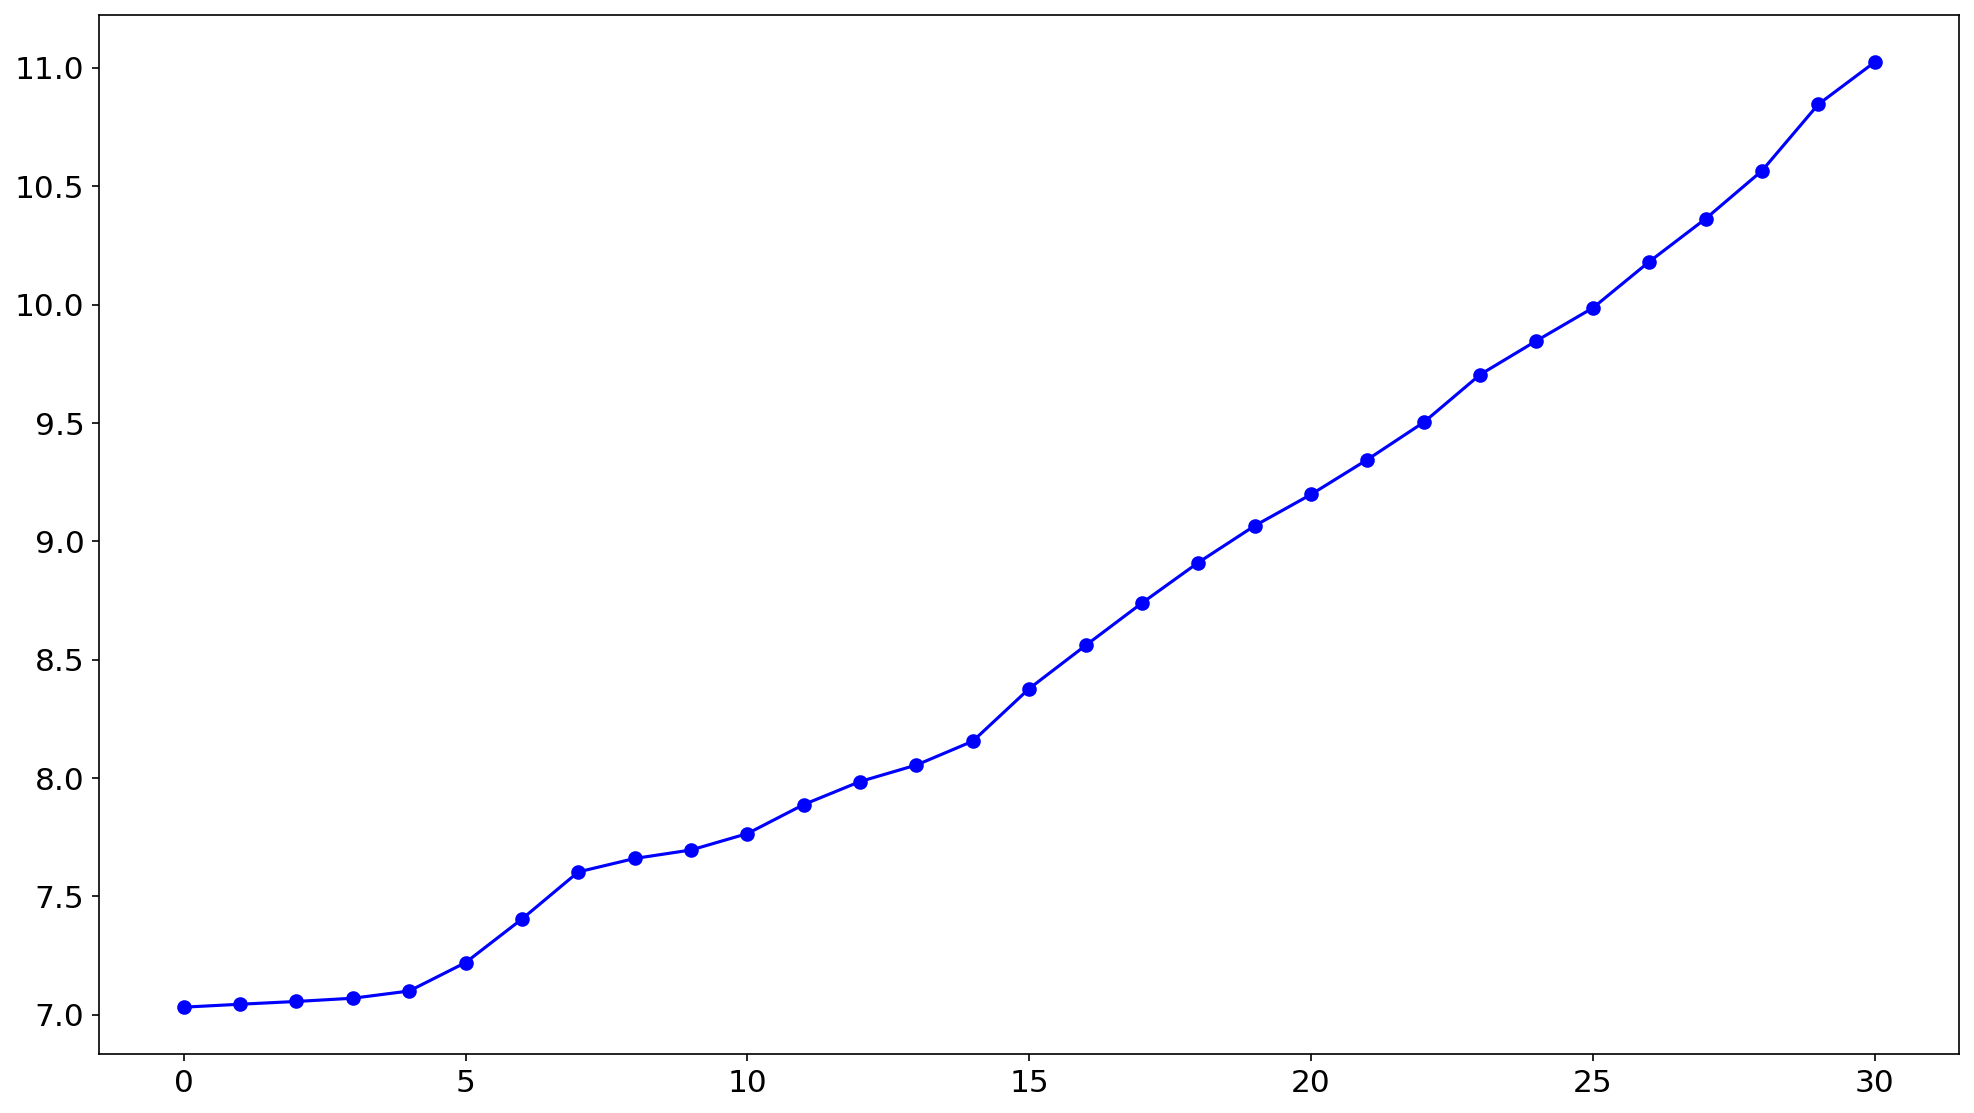

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

# 数据导入并对数变换
original_data = [1132.26, 1146.4, 1159.93, 1175.8, 1212.3, 1367, 1642.9, 2004.82, 2122, 2199.4, 2357.2, 2664.9, 2937.1, 3149.48, 3483.37, 4348.95, 5218.1, 6242.2, 7407.99, 8651.14, 9875.95, 11444.08, 13395.23, 16386.04, 18903.64, 21715.25, 26396.47, 31649.29, 38760.2, 51321.78, 61330.35]
data = np.log(original_data)
print(f'对数变换后的数据：{data}')

# 计算均值和方差
mean = np.mean(data)
variance = np.var(data)
print(f'均值：{mean}，方差：{variance}')

# 绘制序列图做平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(original_data, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='原始序列图.png')

# 绘制对数变换序列图做平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(data, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='对数变换序列图.png')

### 1.2差分与平稳性检验
#### 1.2.1一阶差分与平稳性检验

二阶差分后 ADF 检验统计量：-1.3817369550743137
p 值：0.5909996623032322
临界值（1%）：-3.8092091249999998
临界值（5%）：-3.0216450000000004
临界值（10%）：-2.6507125
一阶差分数据不是平稳的。


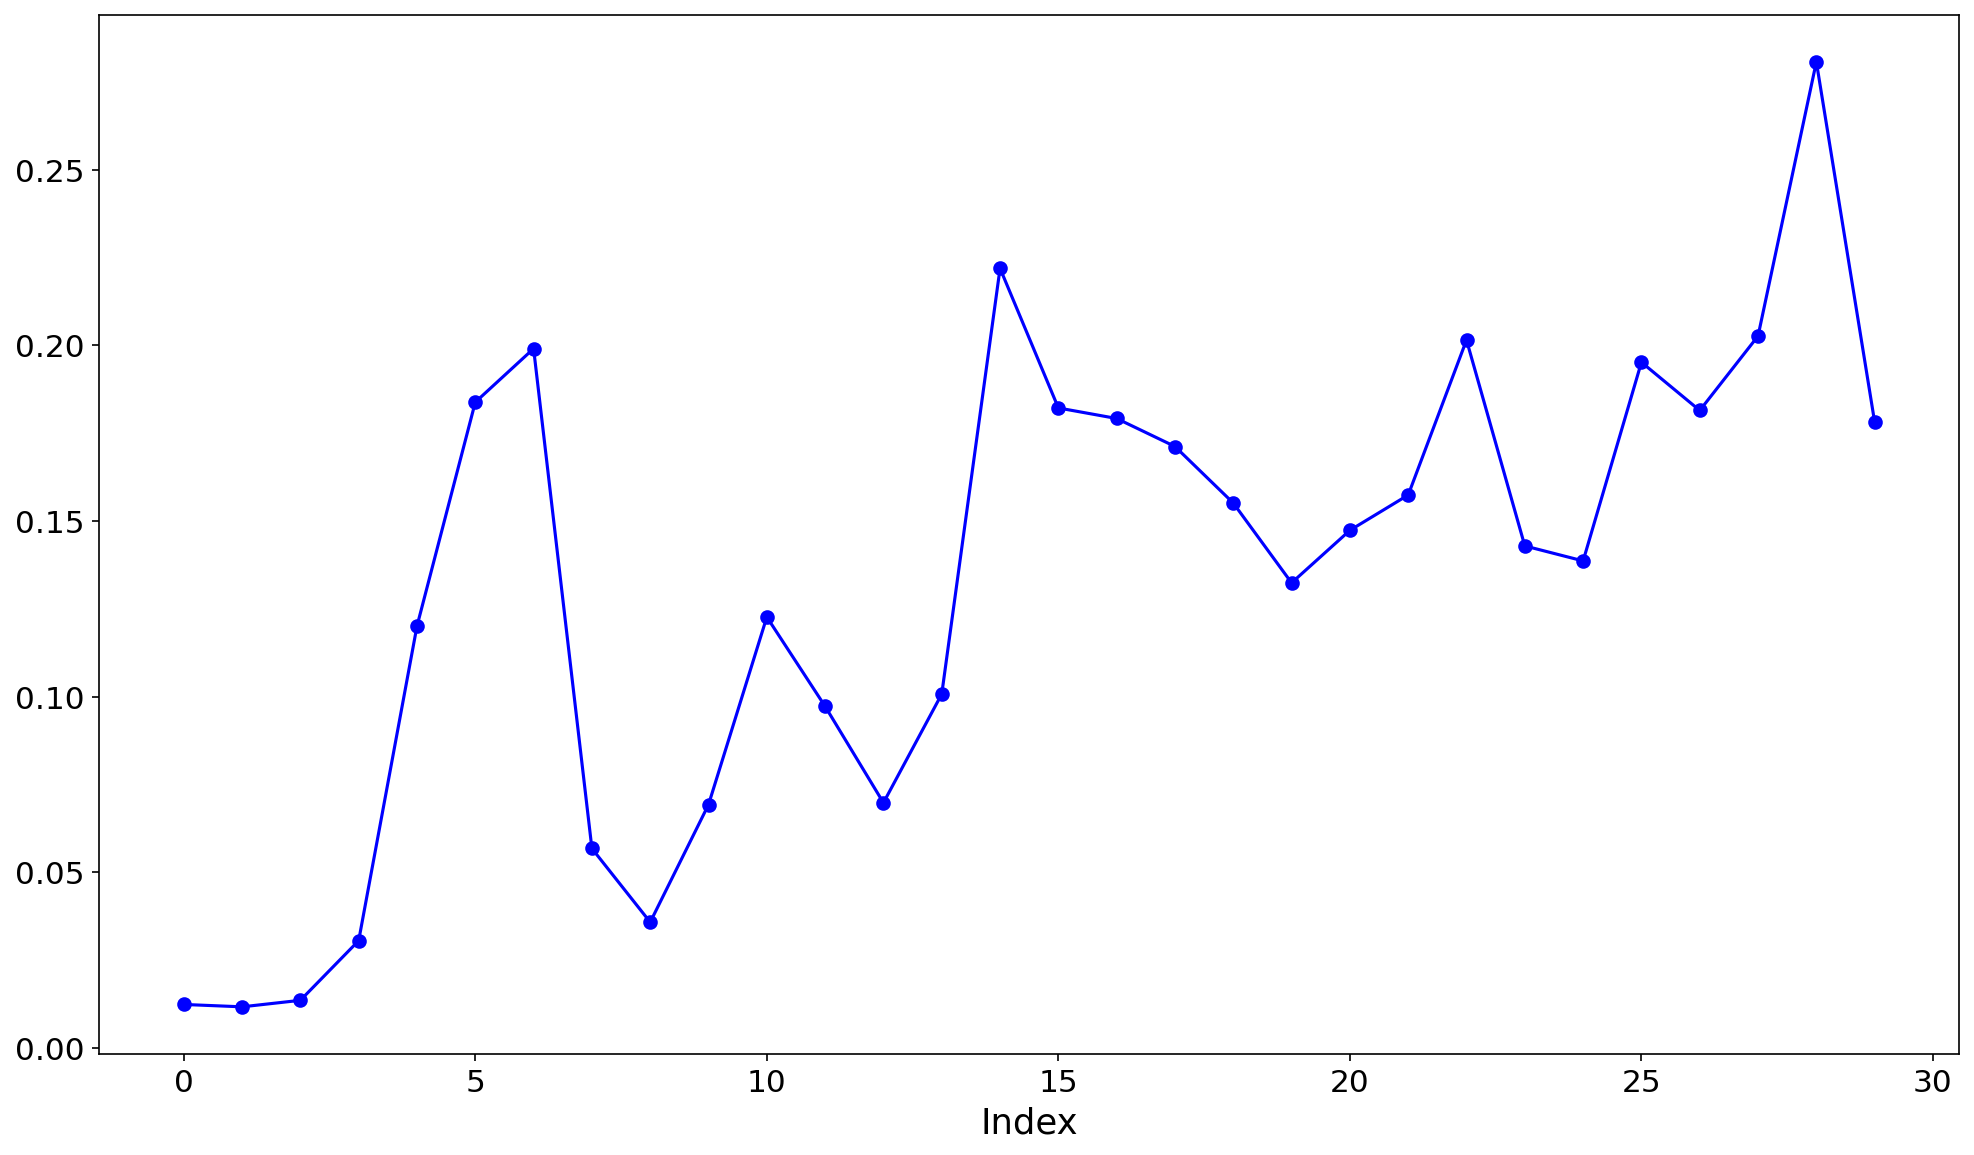

In [2]:
# 一阶差分
first_order_diff = np.diff(data)

# 绘制一阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(first_order_diff, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('Index', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='一阶差分序列图.png')

# 对一阶差分后的数据做 ADF 检验
result_first_order = adfuller(first_order_diff , autolag='AIC')
print(f'二阶差分后 ADF 检验统计量：{result_first_order[0]}')
print(f'p 值：{result_first_order[1]}')
print(f'临界值（1%）：{result_first_order[4]["1%"]}')
print(f'临界值（5%）：{result_first_order[4]["5%"]}')
print(f'临界值（10%）：{result_first_order[4]["10%"]}')

if result_first_order[1] < 0.05:
    print('一阶差分数据是平稳的。')
else:
    print('一阶差分数据不是平稳的。')

#### 1.2.2二阶差分与平稳性检验

二阶差分后 ADF 检验统计量：-1.3817369550743137
p 值：0.00209550906202996
临界值（1%）：-3.8092091249999998
临界值（5%）：-3.0216450000000004
临界值（10%）：-2.6507125
二阶差分数据是平稳的。


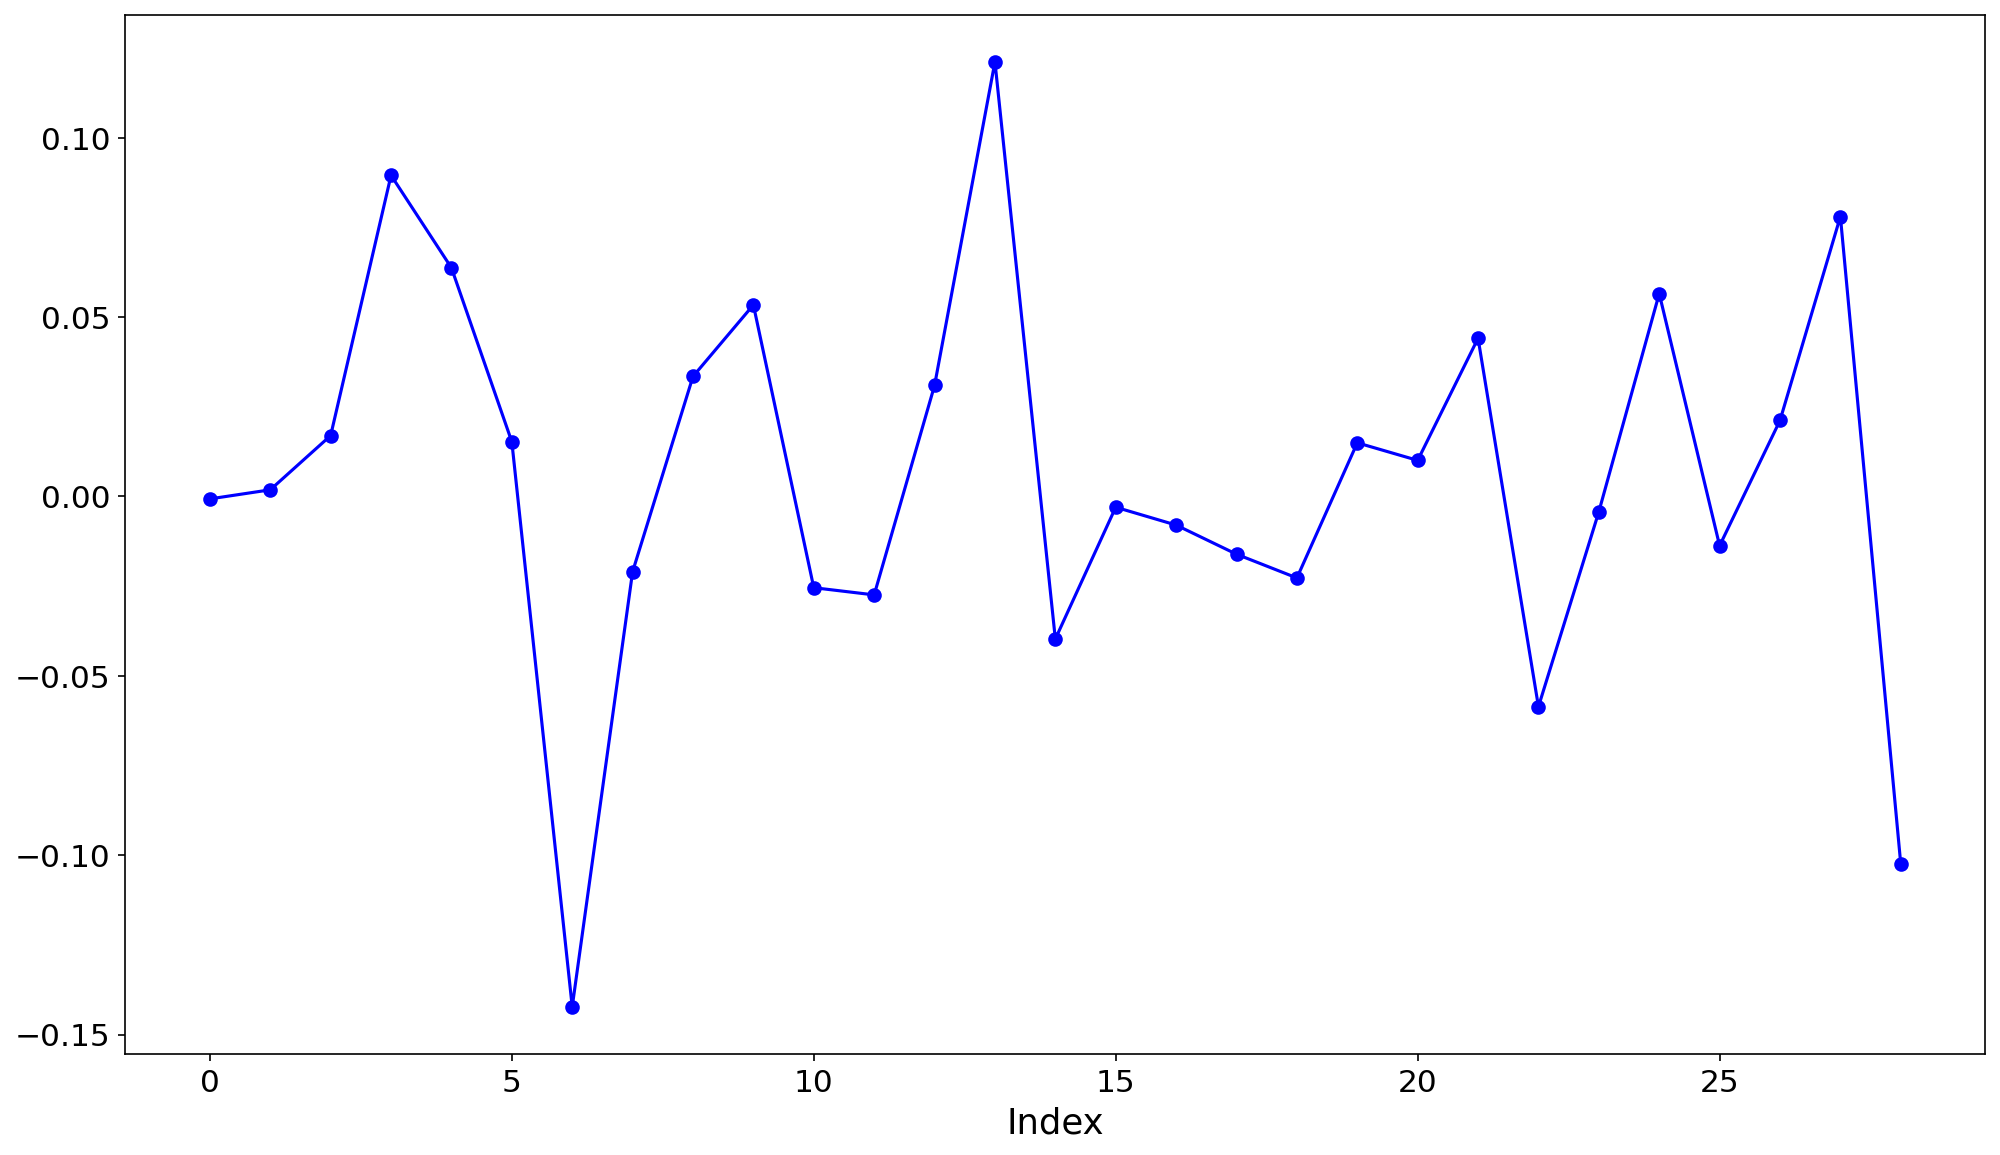

In [3]:
# 二阶差分
second_order_diff = np.diff(np.diff(data))

# 绘制二阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(second_order_diff, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('Index', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='二阶差分序列图.png')

# 对二阶差分后的数据做 ADF 检验
result_second_order = adfuller(second_order_diff , autolag='AIC')
print(f'二阶差分后 ADF 检验统计量：{result_first_order[0]}')
print(f'p 值：{result_second_order[1]}')
print(f'临界值（1%）：{result_second_order[4]["1%"]}')
print(f'临界值（5%）：{result_second_order[4]["5%"]}')
print(f'临界值（10%）：{result_second_order[4]["10%"]}')

if result_second_order[1] < 0.05:
    print('二阶差分数据是平稳的。')
else:
    print('二阶差分数据不是平稳的。')

### 1.3纯随机性检验
已经判断序列为平稳性数据，进一步判断是否为白噪声数据。  
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$
从结果上来看，p值大于0.05，不拒绝原假设，认为这一组序列为白噪声序列，具有纯随机性。

In [5]:
# 纯随机检验
LB = acorr_ljungbox(second_order_diff, lags=range(1, 21), boxpierce=True, return_df=True)
print(LB)

      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.046447   0.829365   0.041952   0.837711
2    3.709450   0.156496   3.232309   0.198661
3    5.036645   0.169133   4.345441   0.226498
4    5.072816   0.279907   4.374611   0.357675
5    5.228246   0.388665   4.494944   0.480560
6    5.373172   0.496916   4.602470   0.595711
7    8.707600   0.274336   6.968838   0.432132
8    9.661238   0.289612   7.614851   0.471967
9    9.702757   0.375080   7.641637   0.570624
10   9.864575   0.452454   7.740816   0.654137
11  10.622533   0.475406   8.180921   0.697011
12  10.787857   0.547182   8.271582   0.763563
13  11.504187   0.568658   8.641301   0.799463
14  11.781614   0.623836   8.775540   0.845155
15  13.748852   0.544656   9.663970   0.840328
16  14.107425   0.590711   9.814339   0.876142
17  14.284771   0.646852   9.882989   0.908445
18  14.285118   0.710325   9.883112   0.935655
19  14.738627   0.739059  10.029406   0.952217
20  15.310039   0.758401  10.195300   0.964491


为了防止过差分的现象，不再进行差分，认为数据无法做ARIMA模型，进而考虑其他模型（主要还是数据太少了，操作空间有限）

## 二、二次指数平滑法
### 2.1对数变换

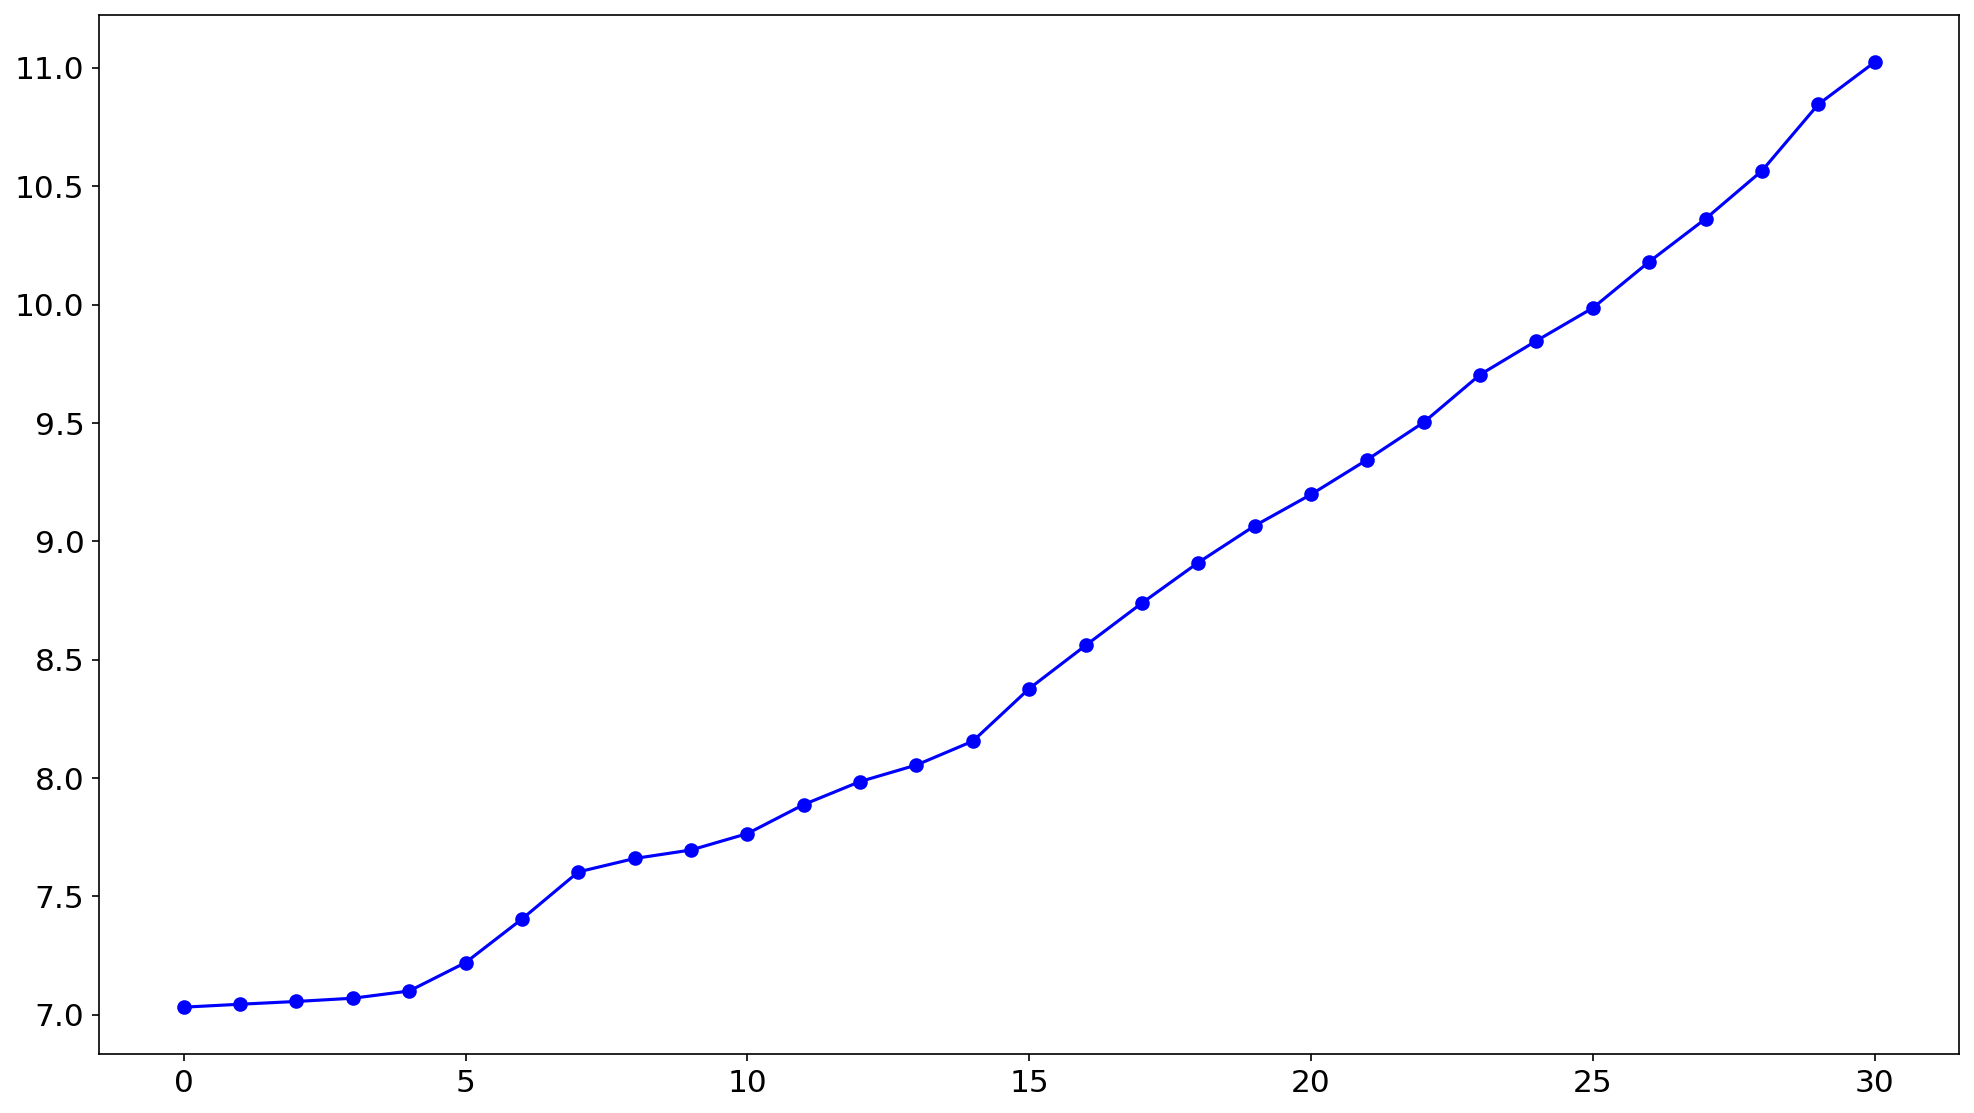

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

# 数据导入并对数变换
original_data = [1132.26, 1146.4, 1159.93, 1175.8, 1212.3, 1367, 1642.9, 2004.82, 2122, 2199.4, 2357.2, 2664.9, 2937.1, 3149.48, 3483.37, 4348.95, 5218.1, 6242.2, 7407.99, 8651.14, 9875.95, 11444.08, 13395.23, 16386.04, 18903.64, 21715.25, 26396.47, 31649.29, 38760.2, 51321.78, 61330.35]
data = np.log(original_data)

# 绘制对数变换序列图做平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(data, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='对数变换序列图.png')

观察到对数变换后的数据有明显的线性趋势，并且没有季节，从而考虑使用二次指数平滑法

### 2.2Holt指数平滑法并预测

预测的未来三个数据点是: 31     73881.608574
32     89001.482588
33    107215.639396
dtype: float64


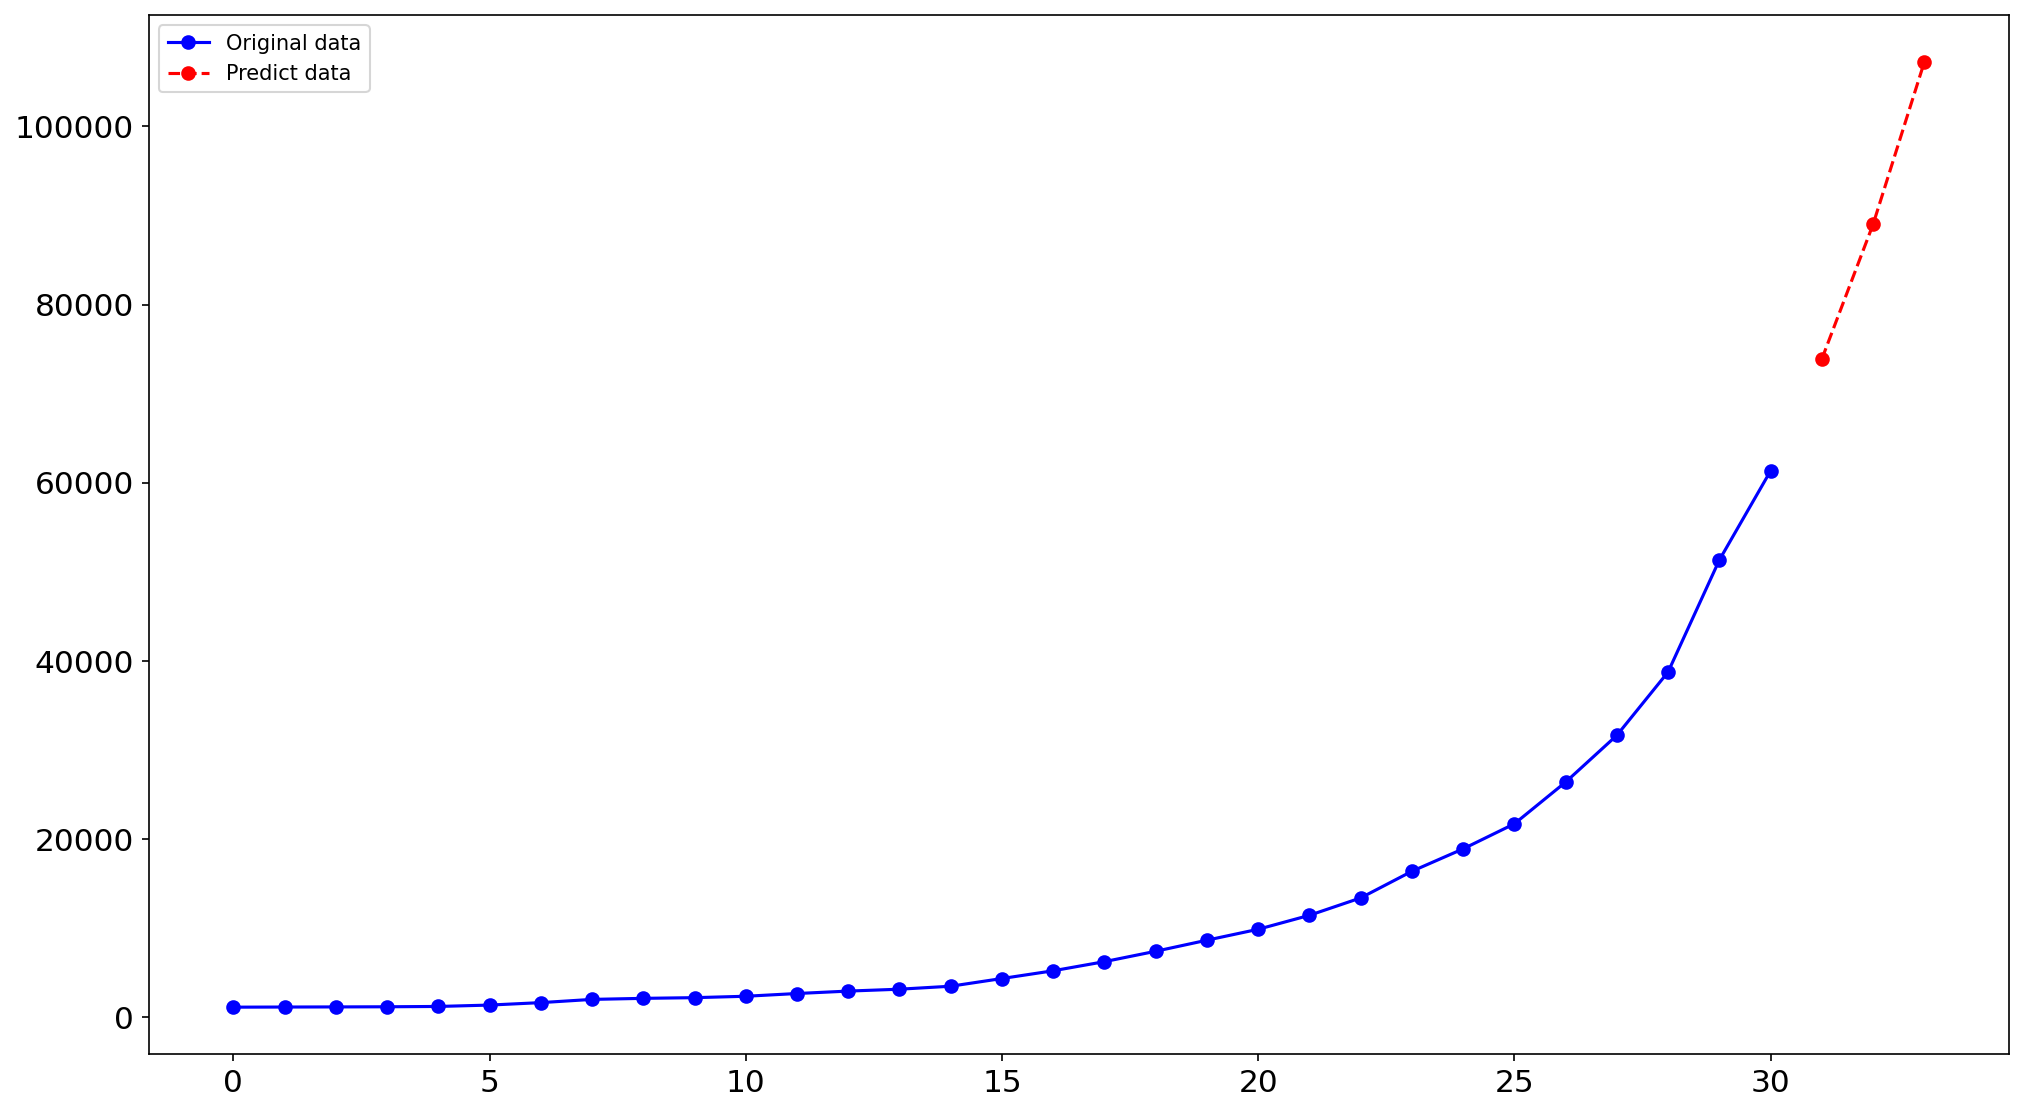

In [7]:
# 将数据转换为Pandas Series
data_series = pd.Series(data)

# 使用Holt线性趋势方法建模
model = ExponentialSmoothing(data_series, trend="add", seasonal=None, damped_trend=False)
model_fit = model.fit()

# 预测未来三个数据
forecast = model_fit.forecast(3)

# 将预测值转换回原始尺度
forecast_original_scale = np.exp(forecast)

print("预测的未来三个数据点是:", forecast_original_scale)

# 绘制原始数据和预测数据
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(np.arange(len(original_data)), original_data, linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original data')
plt.plot(np.arange(len(original_data), len(original_data) + len(forecast_original_scale)), forecast_original_scale, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Predict data')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.savefig(fname='二次指数平滑预测.png')

### 2.3模型的整体效果检验
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$
从结果上来看，阶数大于1后，p值大于0.05，不拒绝原假设，认为这一组序列为白噪声序列，具有纯随机性，模型的整体效果较好。

     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   4.994299   0.025431  4.540272   0.033106
2   5.452134   0.065476  4.942612   0.084474
3   6.155804   0.104271  5.539665   0.136285
4   7.310569   0.120358  6.484473   0.165771
5   7.366912   0.194751  6.528864   0.258102
6   8.370280   0.212211  7.288992   0.294946
7   8.568863   0.285109  7.433415   0.385188
8   8.568869   0.379959  7.433419   0.490671
9   8.649171   0.470268  7.486954   0.586556
10  8.651986   0.565419  7.488745   0.678638
11  8.686318   0.650821  7.509553   0.756446
12  8.688467   0.729284  7.510790   0.822098
13  8.690501   0.795896  7.511900   0.873883
14  8.820523   0.842373  7.578881   0.910092
15  8.961725   0.879510  7.647342   0.937142
16  8.967973   0.914727  7.650182   0.958605
17  8.971811   0.941142  7.651811   0.973436
18  8.977914   0.960252  7.654215   0.983352
19  8.988884   0.973664  7.658204   0.989792
20  9.010087   0.982790  7.665272   0.993861


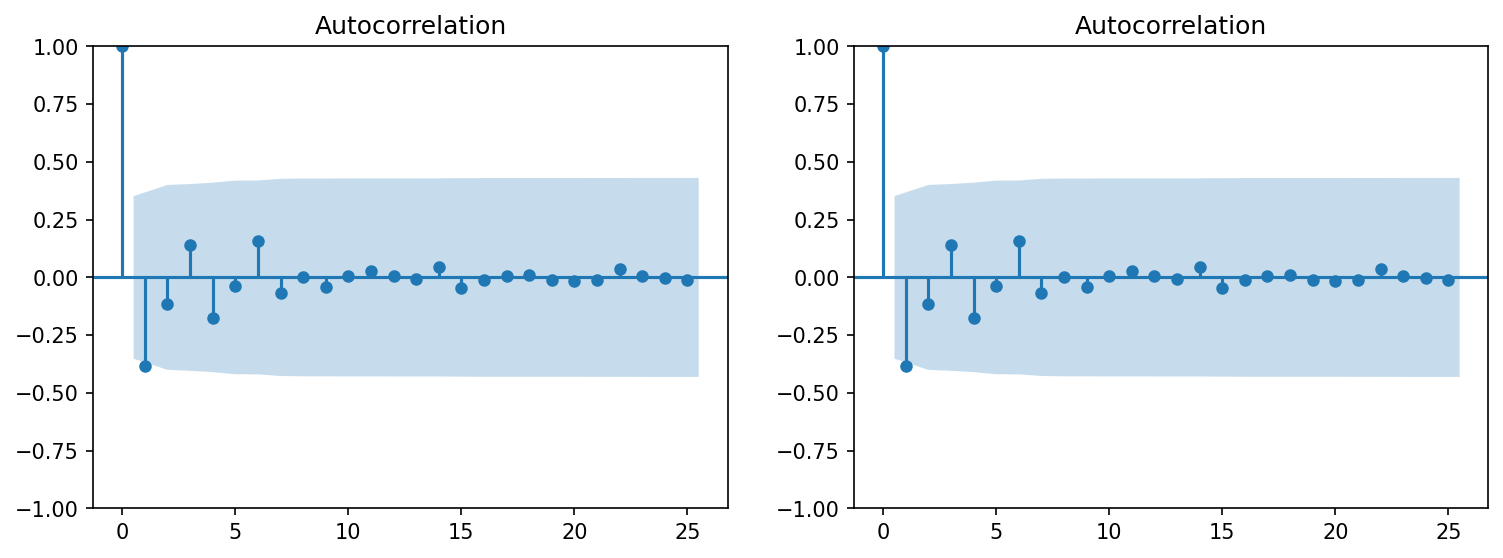

In [8]:
# 模型整体效果检验
residuals = original_data - np.exp(model_fit.fittedvalues)
LB = acorr_ljungbox(residuals, lags=range(1, 21), boxpierce=True, return_df=True)
print(LB)

fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(residuals, lags=25, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_acf(residuals, lags=25, ax=ax2)
plt.savefig(fname='指数平滑残差相关图.png')

从结果上来看，残差序列是纯随机的，信息提取充分

## 三、回归拟合与残差的Auto-Regressive
### 3.1使用多项式拟合  
同样先对数变换，再使用多项式迭代拟合，拟合效果还不错，拟合方程为：
$$data = 233386.31  -346.49  year^1 + 0.17  year^2  -0.00  year^3 +\epsilon_t$$
$$R^2=0.9979$$

最佳方程：y = 233386.31 + -346.49 * x^1 + 0.17 * x^2 + -0.00 * x^3
R² 值：0.9979
未来三个数据预测：[ 72329.23290812  88468.05156622 108448.8620599 ]


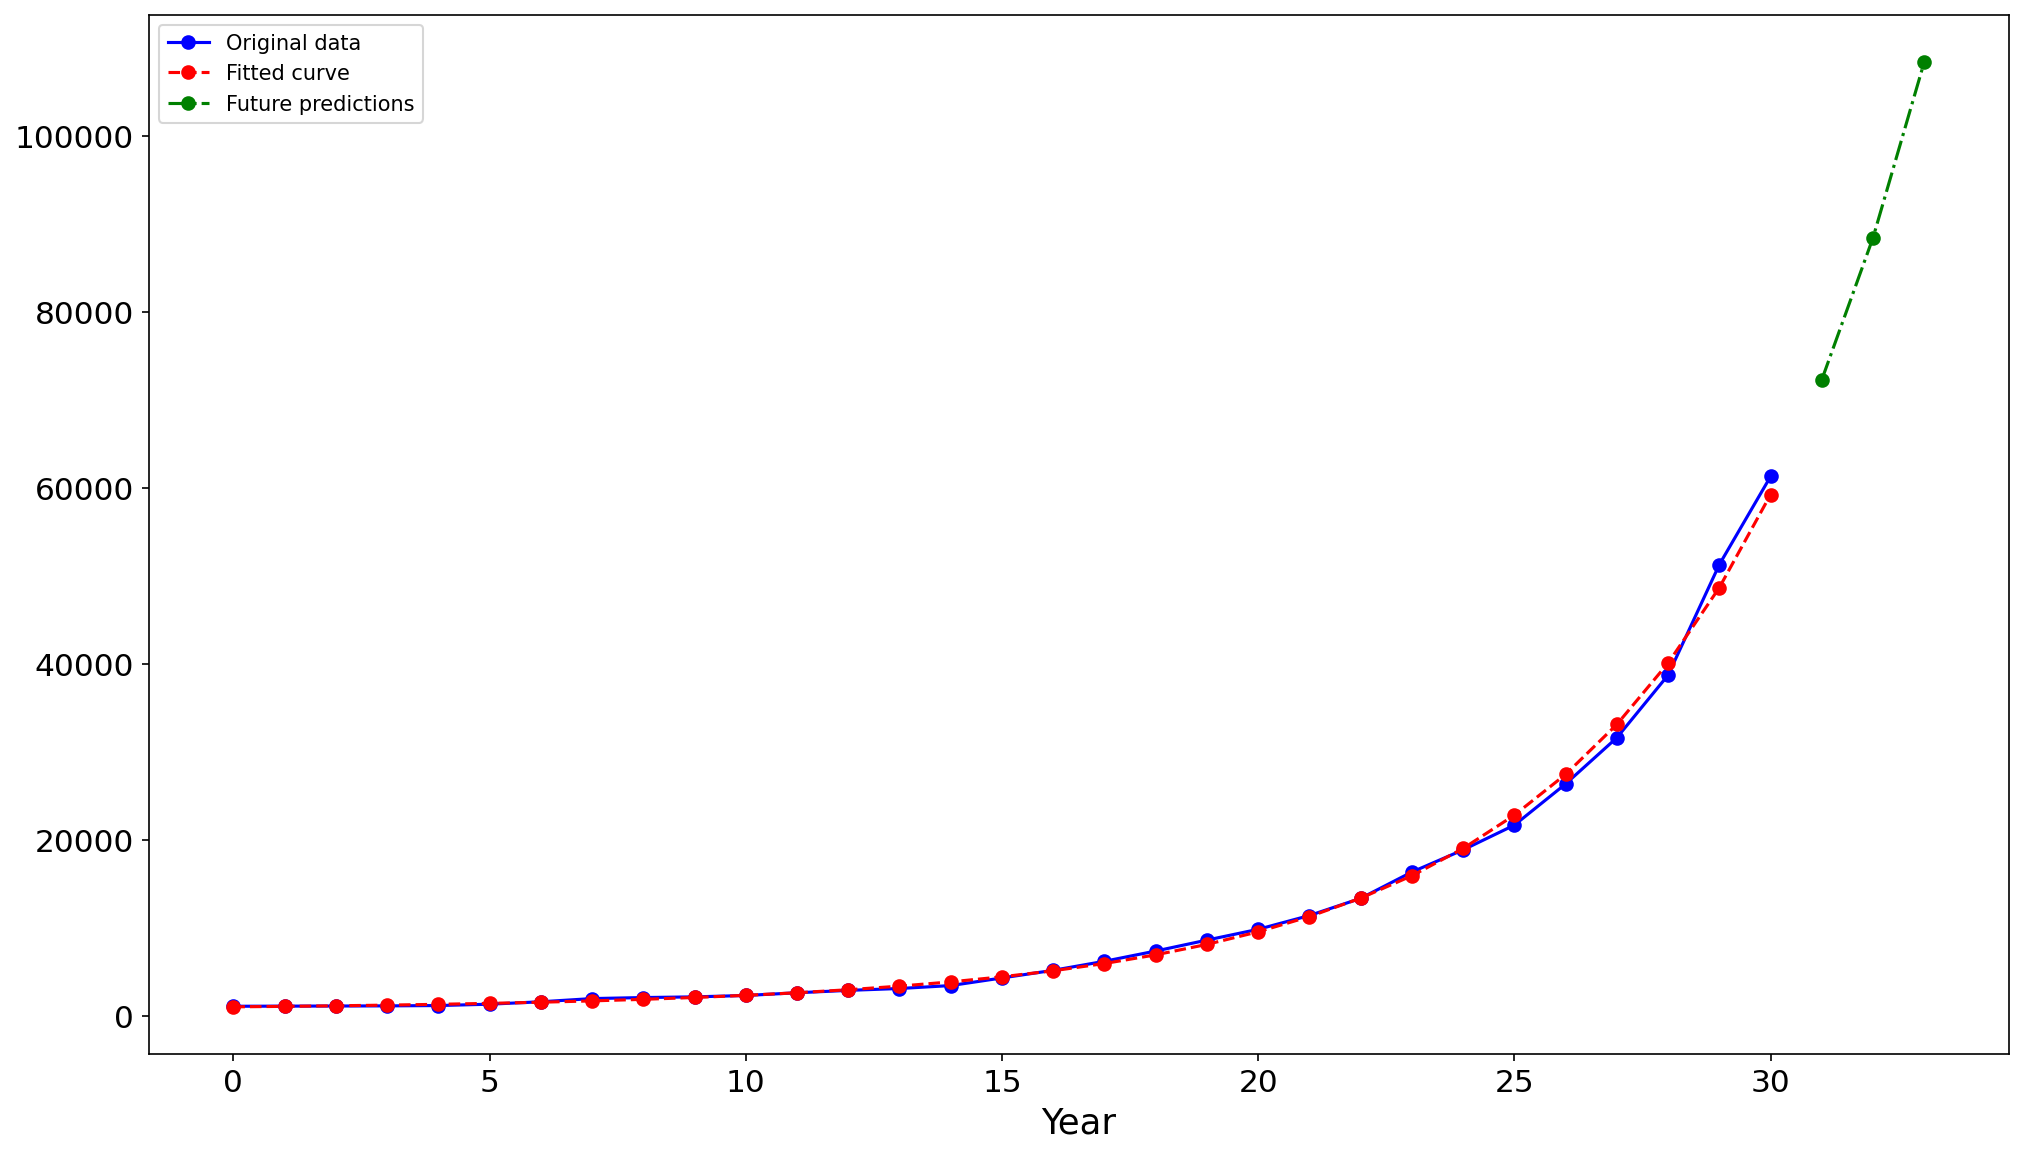

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# 数据导入
years = np.arange(1978, 2009)
original_data = [1132.26, 1146.4, 1159.93, 1175.8, 1212.3, 1367, 1642.9, 2004.82, 2122, 2199.4, 2357.2, 2664.9, 2937.1, 3149.48, 3483.37, 4348.95, 5218.1, 6242.2, 7407.99, 8651.14, 9875.95, 11444.08, 13395.23, 16386.04, 18903.64, 21715.25, 26396.47, 31649.29, 38760.2, 51321.78, 61330.35]
data = np.log(original_data)

## 多项式拟合
# 选择多项式的次数
degrees = range(1, 20)
best_degree = None
best_r2 = -np.inf

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(years.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, data)
    y_pred = lin_reg.predict(X_poly)
    r2 = r2_score(data, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

# 进行最佳次数的多项式拟合
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(years.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, data)
y_pred = lin_reg.predict(X_poly)
y_pred =np.exp(y_pred)

# 输出最佳方程和 R² 值
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients[1:], start=1):
    equation += f" + {coef:.2f} * x^{i}"
print(f"最佳方程：{equation}")
print(f"R² 值：{best_r2:.4f}")

# 预测未来三个数据
future_years = np.array([2009, 2010, 2011])
future_X_poly = poly_features.transform(future_years.reshape(-1, 1))
future_predictions = lin_reg.predict(future_X_poly)
future_predictions = np.exp(future_predictions)
print(f"未来三个数据预测：{future_predictions}")

# 绘制原始数据和预测数据
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(np.arange(len(years)), original_data, linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original data')
plt.plot(np.arange(0, len(y_pred)), y_pred, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Fitted curve')
plt.plot(np.arange(len(y_pred), len(y_pred) + len(future_predictions)), future_predictions, linestyle='-.', color='g', marker='o', markerfacecolor='g', label='Future predictions')
plt.xlabel('Year', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.savefig(fname='多项式拟合预测.png')


### 3.2残差检验

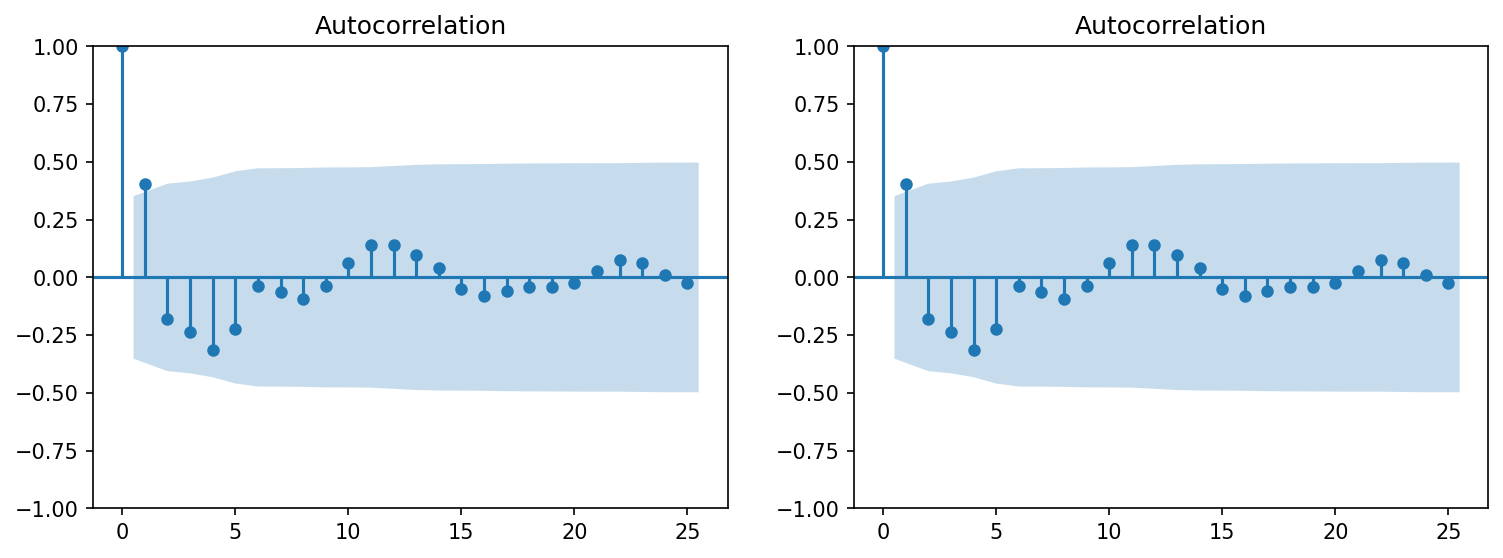

In [10]:
# 残差检验
residuals = original_data - y_pred

fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(residuals, lags=25, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_acf(residuals, lags=25, ax=ax2)
plt.savefig(fname='回归残差相关图.png')

### 3.3残差Auto-Regressive
显然相关图中表示，残差中还有未提取完的信息

In [12]:
rsd = pd.Series(residuals)
res = AutoReg(rsd, lags=3, trend='n').fit()
print(res.summary().tables[1])
print('残差的标准差 = ', np.std(res.resid))

result = acorr_ljungbox(res.resid[1:], lags=range(1, 21), boxpierce=True, return_df=True)
print(result)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.5393      0.199      2.715      0.007       0.150       0.929
y.L2          -0.2663      0.519     -0.513      0.608      -1.283       0.750
y.L3          -0.4464      0.583     -0.766      0.444      -1.589       0.696
残差的标准差 =  649.3378392303221
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.294800   0.587161  0.264304   0.607179
2   0.615360   0.735150  0.540649   0.763132
3   0.912995   0.822291  0.786967   0.852582
4   2.861462   0.581270  2.332303   0.674894
5   3.964536   0.554533  3.169118   0.673931
6   3.975800   0.679951  3.177275   0.786291
7   4.274666   0.747653  3.383389   0.847418
8   4.293557   0.829714  3.395766   0.907127
9   4.325298   0.888728  3.415467   0.945526
10  4.416712   0.926597  3.469055   0.968139
11  4.832920   0.938987  3.698686   0.977917
12  4.962369   0.959224  3.765643   0

因此最终结果是：
$$\begin{cases}data = 233386.31  -346.49  year^1 + 0.17  year^2  -0.00  year^3 +\epsilon_t\\ \epsilon_t= 0.5393\epsilon_{t-1} -0.2663\epsilon_{t-2}-0.4464\epsilon_{t-3}+a_t\end{cases}$$

### 3.4模型预测

调整后的未来三个数据预测：31     73349.731223
32     87302.615345
33    106631.535323
dtype: float64


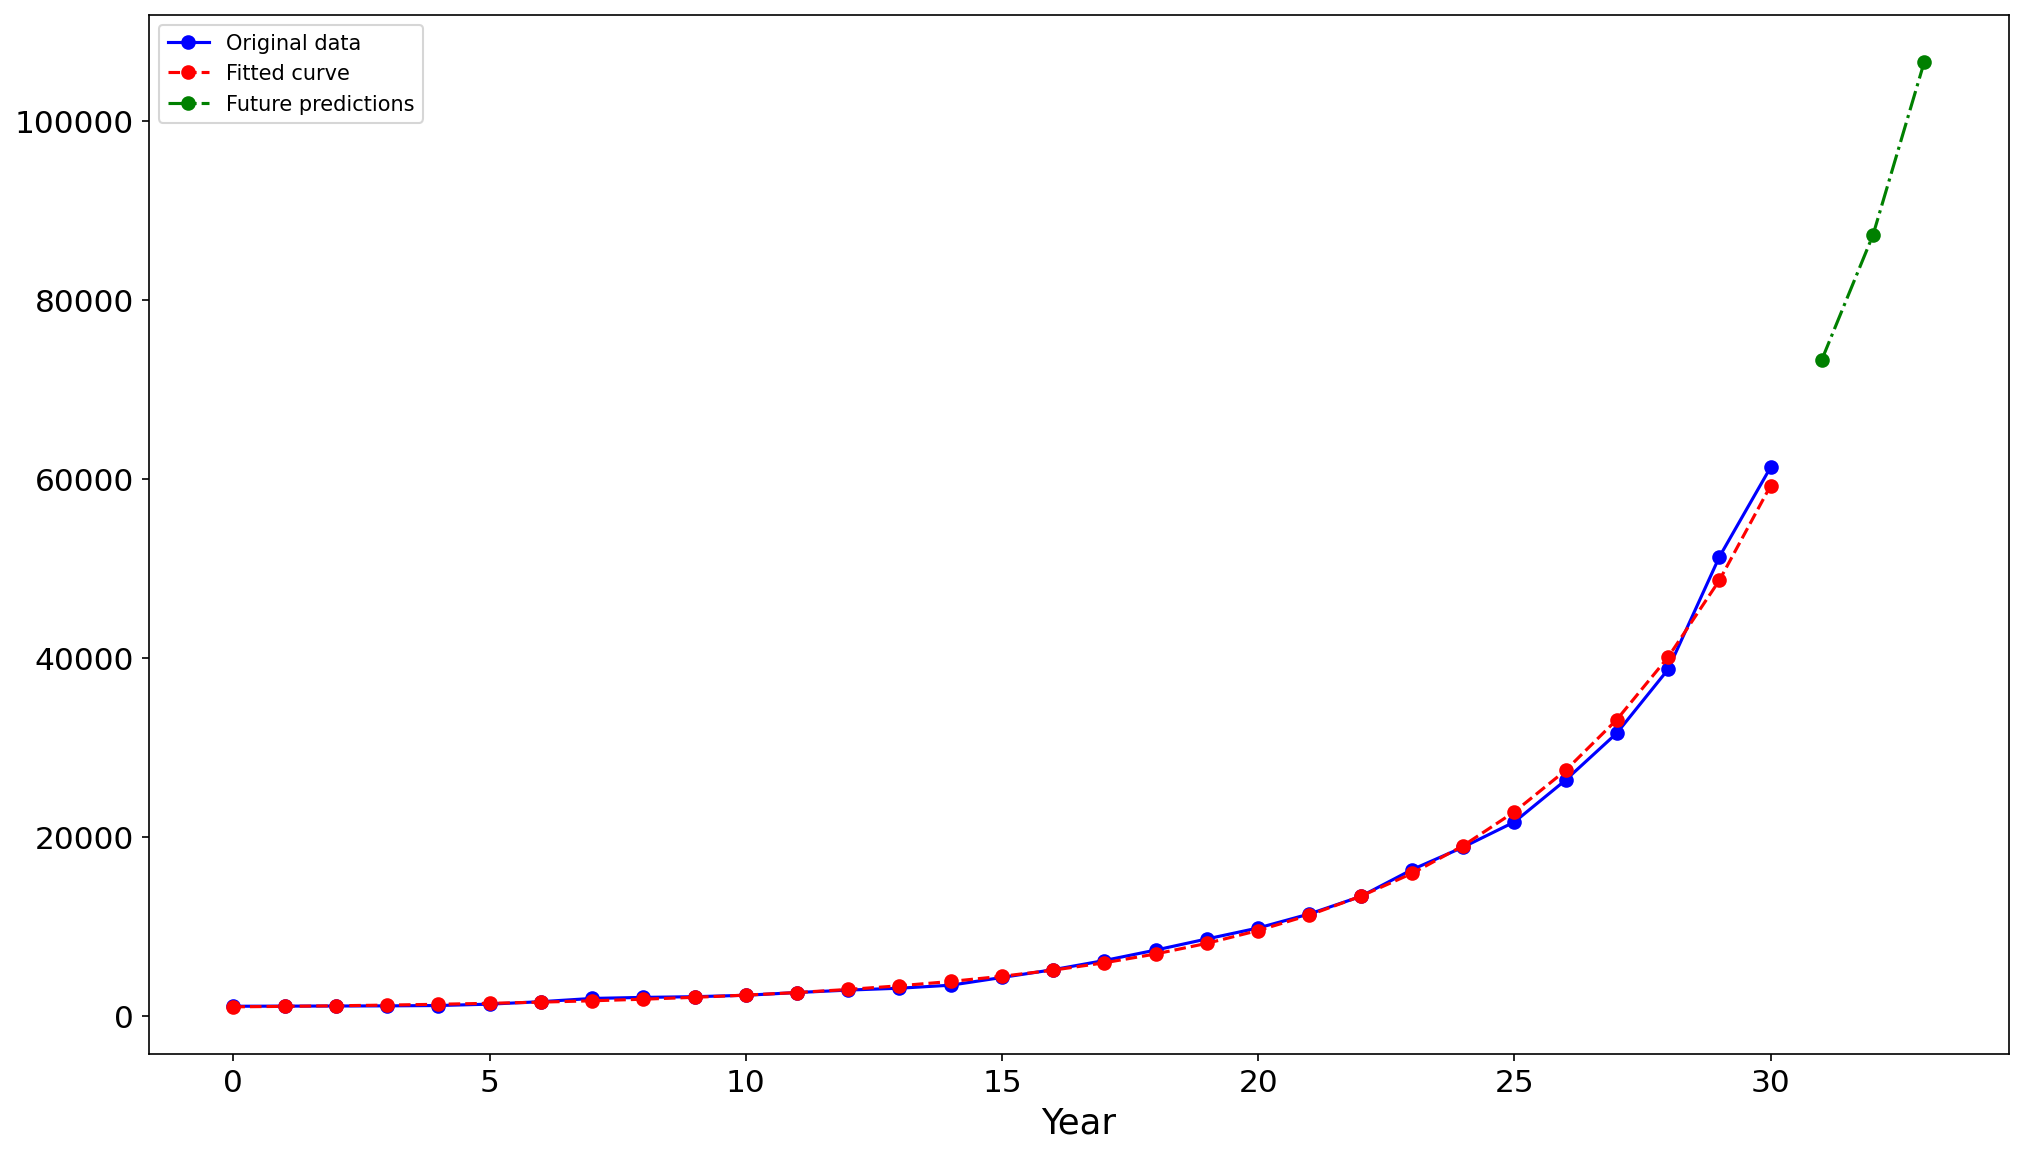

In [13]:
future_residuals_pred = res.predict(start=len(residuals), end=len(residuals)+2)
future_predictions = future_predictions + future_residuals_pred
print(f"调整后的未来三个数据预测：{future_predictions}")

# 绘制原始数据和预测数据
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(np.arange(len(years)), original_data, linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original data')
plt.plot(np.arange(0, len(y_pred)), y_pred, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Fitted curve')
plt.plot(np.arange(len(y_pred), len(y_pred) + len(future_predictions)), future_predictions, linestyle='-.', color='g', marker='o', markerfacecolor='g', label='Future predictions')
plt.xlabel('Year', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.savefig(fname='调整后的多项式拟合预测.png')